# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>
Luca Maria Colombo Gomez - Matr: 934049

Simulate 1D Ising model sampling sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$

- with the Metropolis sampling algorithm 
- with the Gibbs sampling algorithm

The possibility to restart from a previous spin configuration has been added as a boolean like variable in the input file, in a way similar to the Notebook 04.
It's also possible to choose which sampling method to use, between Metropolis algorithm and Gibbs sampling.

A single MC step for the Metropolis algorithm means attempting to flip one time each spin state, and then performing the Metropolis evaluation, while the Gibbs sampling algorithm sample a new spin state ignoring the old spin configuration.

In the following plots, I show the values obtained with both the sampling models, and the analytical expected values for comparison, for the following physical quantities. 

1. Internal energy : $U(N,T,h=0)$
2. Heat capacity : $C(N,T,h=0)$
3. Magnetization : $M(N,T,h=0.02)$
4. Magnetic subsceptibility : $\chi(N,T,h=0)$

The system performs 1000 steps of equilibration before the physical quantities can be collected, and the estimates are calculated using data blocking, with 100 blocks of 10000 steps each.

All the quantities are drawn as functions of the temperature in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$. 


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Common variables for analityc solutions
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
h= 0.02
J = 1.0
Ns = 50

### Internal energy $U(N,T)$

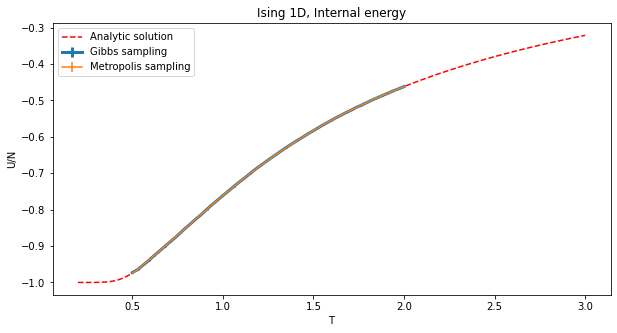

In [45]:
fig = plt.figure(figsize = (10, 5))

th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e, label = 'Analytic solution', linestyle = 'dashed', color = 'red')
temp, val, err = np.loadtxt("6.1/data/energy_gibbs.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Gibbs sampling",linewidth =3)
temp, val, err = np.loadtxt("6.1/data/energy_metropolis.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Metropolis sampling")
plt.title('Ising 1D, Internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.legend()
plt.show()

### Heat capacity  $C(N,T)$


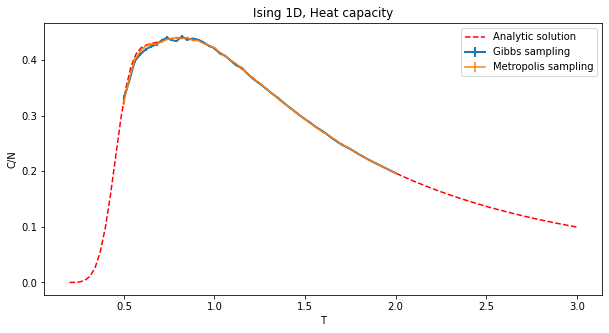

In [46]:
fig = plt.figure(figsize = (10, 5))

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat, label = 'Analytic solution',linestyle = 'dashed', color = 'red')
temp, val, err = np.loadtxt("6.1/data/heat_capacity_gibbs.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Gibbs sampling", linewidth = 2)
temp, val, err = np.loadtxt("6.1/data/heat_capacity_metropolis.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Metropolis sampling")
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C/N')
plt.legend()
plt.show()

### Magnetization : $M(N,T,h=0.02)$

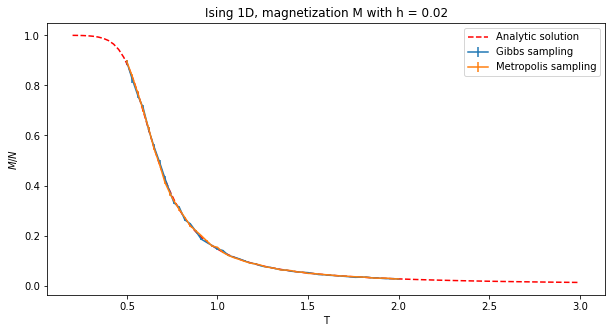

In [47]:
fig = plt.figure(figsize = (10, 5))

b=1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

temp, val, err = np.loadtxt("6.1/data/magnetization_gibbs.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Gibbs sampling")
temp, val, err = np.loadtxt("6.1/data/magnetization_metropolis.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Metropolis sampling")

plt.plot(T, M, label = 'Analytic solution',linestyle='dashed', color = 'red')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M/N$')
plt.legend()
plt.show()

### Magnetic subsceptibility : $\chi(N,T)$

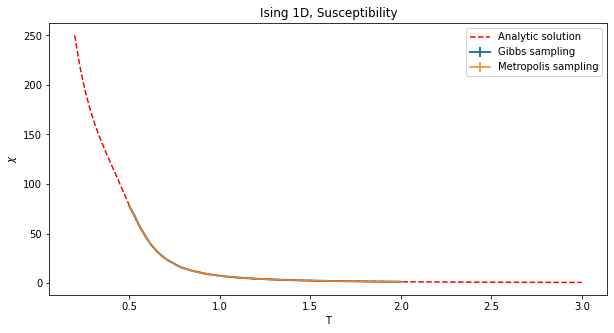

In [48]:
fig = plt.figure(figsize = (10, 5))

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X, label = 'Analytic solution', linestyle = 'dashed', color = 'red')
temp, val, err = np.loadtxt("6.1/data/susceptibility_gibbs.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Gibbs sampling", linewidth = 2)
temp, val, err = np.loadtxt("6.1/data/susceptibility_metropolis.out", unpack = True)
plt.errorbar(temp, val, yerr = err, label = "Metropolis sampling")

plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.legend()
plt.show()